In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 

from aiutils import load
from config import GameConfig
from enums import StartingSplit, FeatureType
from env import DefaultEnvironment
from player import init_players

In [2]:
project_root = '/home/justiny/Documents/Projects/PyDominion'
model_dir = os.path.join(project_root, 'models')
fig_dir = os.path.join(project_root, 'figures')
data_dir = os.path.join(project_root, 'data')

## Plot logistic weights ##

In [4]:
model_name = 'default-mlog'
model_path = os.path.join(model_dir, model_name)
models = load(model_path)['models']

In [11]:
config = GameConfig(split=StartingSplit.StartingRandomSplit, sandbox=True, feature_type=FeatureType.ReducedFeature)
players = init_players(['BM', 'BM'], train=False)
env = DefaultEnvironment(config=config, players=players)
idxs = env.game.state.feature.idxs 

In [47]:
colors = ['#b87333', '#a47abb','#9dd57d', '#81a566', '#3a923d', '#c0c0c0', '#ffd700']
cmap = sns.diverging_palette(250, 0, s=94., l=42.5, n=9)

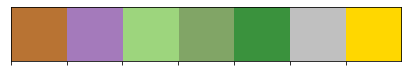

In [46]:
sns.palplot(colors)

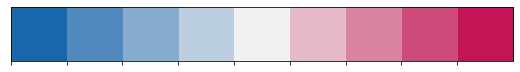

In [48]:
sns.palplot(cmap)

In [33]:
sns.set_palette(colors)

In [48]:
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.025, hspace=0.05)

Text(0.5, 1.0, 'Weight Differences')

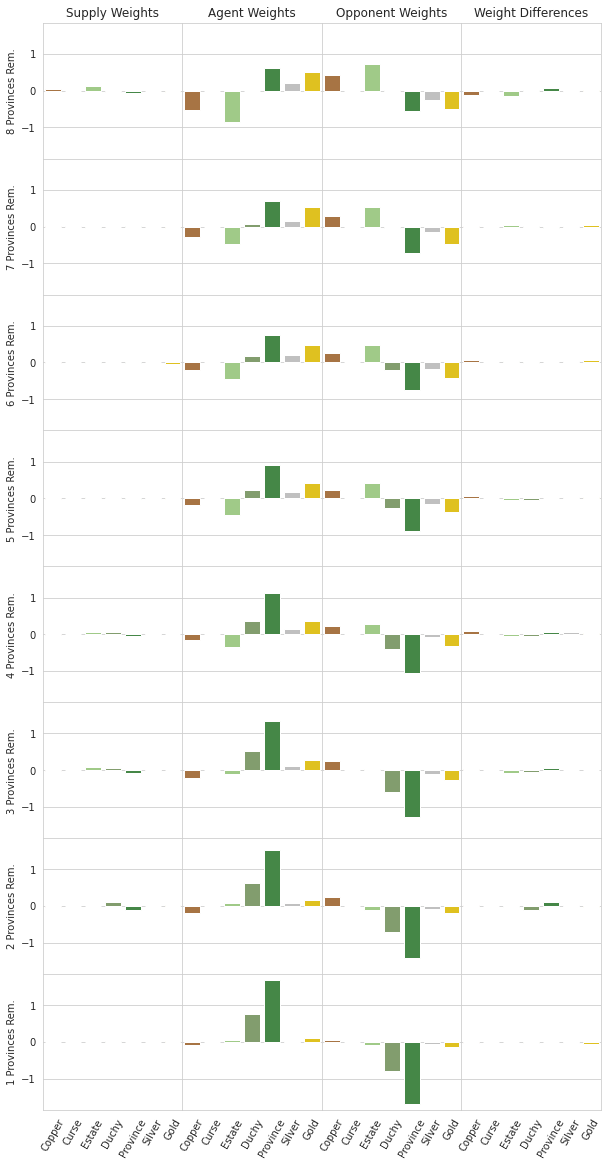

In [51]:
fig, axes = plt.subplots(8, 4, figsize=(10,20), sharey='all', sharex='all', gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(1, 9):
    plot_model = models[9-i]
    
    sns.set_style('whitegrid')
    agent_weights = plot_model.coef_[0][7:14]
    opp_weights = plot_model.coef_[0][14:21]
    supply_weights = plot_model.coef_[0][:7]
    player_weight_diffs = agent_weights + opp_weights
    cards = list(str(k()) for k in idxs.keys())

    sns.barplot(x=cards, y=supply_weights, ax=axes[i-1, 0])
    sns.barplot(x=cards, y=agent_weights, ax=axes[i-1, 1])
    sns.barplot(x=cards, y=opp_weights, ax=axes[i-1, 2])
    sns.barplot(x=cards, y=player_weight_diffs, ax=axes[i-1, 3])

    axes[i-1, 0].set_ylabel(f'{9-i} Provinces Rem.')

    for ax in axes[i-1]: 
        ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

axes[0, 0].set_title('Supply Weights')
axes[0, 1].set_title('Agent Weights')
axes[0, 2].set_title('Opponent Weights')
axes[0, 3].set_title('Weight Differences')

In [52]:
fig_name = 'sandbox-weights.png'
fig.savefig(os.path.join(fig_dir, fig_name))

## Plot Full Dominion Prelim Scores 
##

In [5]:
bm_uct_scores = load(os.path.join(data_dir, 'bm-uct-10k-scores'))
dw_uct_scores = load(os.path.join(data_dir, 'dw-uct-10k-scores'))
uct_bm_scores = load(os.path.join(data_dir, 'uct-bm-10k-scores'))
uct_dw_scores = load(os.path.join(data_dir, 'uct-dw-10k-scores'))
uct_uct_scores = load(os.path.join(data_dir, 'uct-uct-10k-scores'))

In [43]:
data = [bm_uct_scores[['Player', 'Score']], uct_bm_scores[['Player', 'Score']], dw_uct_scores[['Player', 'Score']], uct_dw_scores[['Player', 'Score']], uct_uct_scores[['Player', 'Score']]]

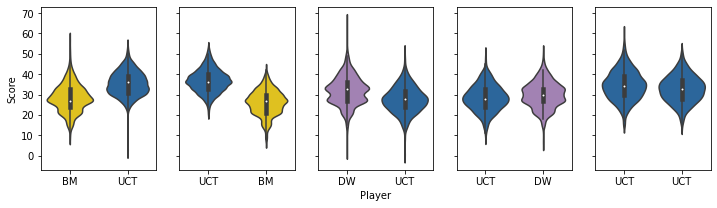

In [54]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3), sharey='all')

sns.violinplot(data=data[0], x='Player', y='Score', ax=axes[0], palette=[colors[-1], cmap[0]])
sns.violinplot(data=data[1], x='Player', y='Score', ax=axes[1], palette=[cmap[0], colors[-1]])
sns.violinplot(data=data[2], x='Player', y='Score', ax=axes[2], palette=[colors[1], cmap[0]])
sns.violinplot(data=data[3], x='Player', y='Score', ax=axes[3], palette=[cmap[0], colors[1]])
sns.violinplot(data=data[4], x='Player', y='Score', ax=axes[4], palette=[cmap[0], cmap[0]])


for i in range(1, 5):
    axes[i].set_ylabel('')

axes[0].set_xticklabels(['BM', 'UCT'])
axes[1].set_xticklabels(['UCT', 'BM'])
axes[2].set_xticklabels(['DW', 'UCT'])
axes[3].set_xticklabels(['UCT', 'DW'])
axes[4].set_xticklabels(['UCT', 'UCT'])

for i in range(5):
    if i == 2: 
        axes[i].set_label('Player\n')
        continue 
    axes[i].set_xlabel('')


In [53]:
fig.savefig(os.path.join(fig_dir, 'full-prelim-scores.png'), dpi=600)